---
# 🧠 Breast Cancer Detection using Machine Learning
---
### End-to-End Classification Project | Data Preprocessing · Model Training · Evaluation       ·   Prediction
---

### Predict whether a tumor is malignant or benign based on diagnostic features using supervised learning algorithms.
---

### Importing Required Libraries

In [5]:
# Data handling and manipulation
import pandas as pd
import numpy as np

# For loading and exploring the dataset
from sklearn.datasets import load_breast_cancer

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing utilities
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Model evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import cross_val_score

### Loading the Dataset

In [6]:
# Load the breast cancer dataset from sklearn
from sklearn.datasets import load_breast_cancer

# Load the dataset into a variable
data = load_breast_cancer()

# Convert the dataset into a pandas DataFrame for easier manipulation
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column (labels) to the DataFrame
df['target'] = data.target

# Display the first few rows of the dataset
df.head()

# Display the first few rows of the dataset
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


### Understanding the Dataset Structure

In [7]:
# Checking shape of Data
print("Shape of the dataset:", df.shape)

Shape of the dataset: (569, 31)


In [8]:
# Check for missing data in the dataset
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [9]:
# Get statistical measures about the dataset
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [10]:
# Check how the dataset is distributed between the two classes (Benign and Malignant)
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [11]:
df.groupby('target').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


# Visualizing the Dataset

### Class Distribution - Shows the dataset is balanced or imbalanced

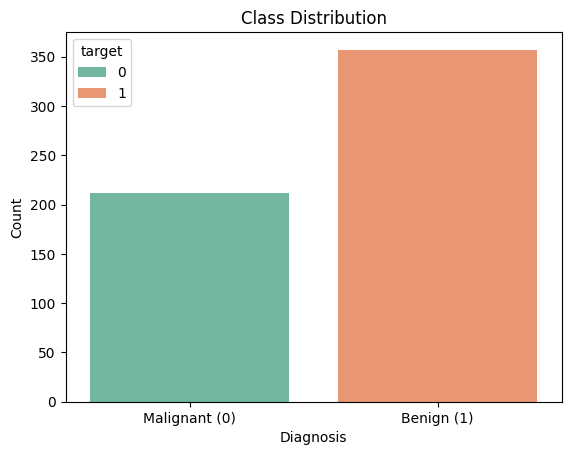

In [12]:
sns.countplot(x='target', data=df, hue='target', palette='Set2')
plt.title('Class Distribution')
plt.xticks([0, 1],['Malignant (0)', 'Benign (1)'])
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show() 


### Correlation Heatmap – Understand Feature Relationships

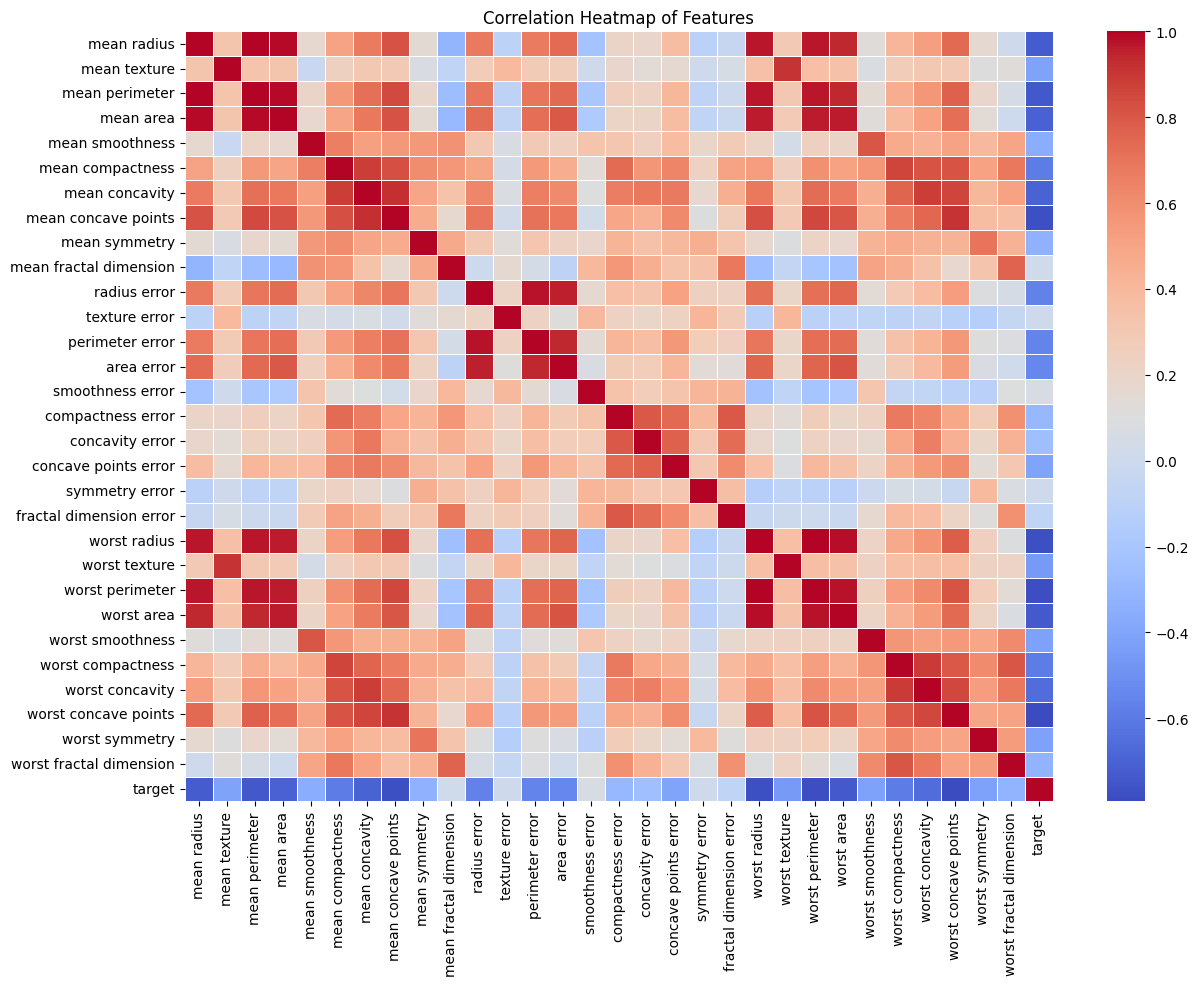

In [13]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

### Pairplot – Visualizing Relationships Between Features and Classes

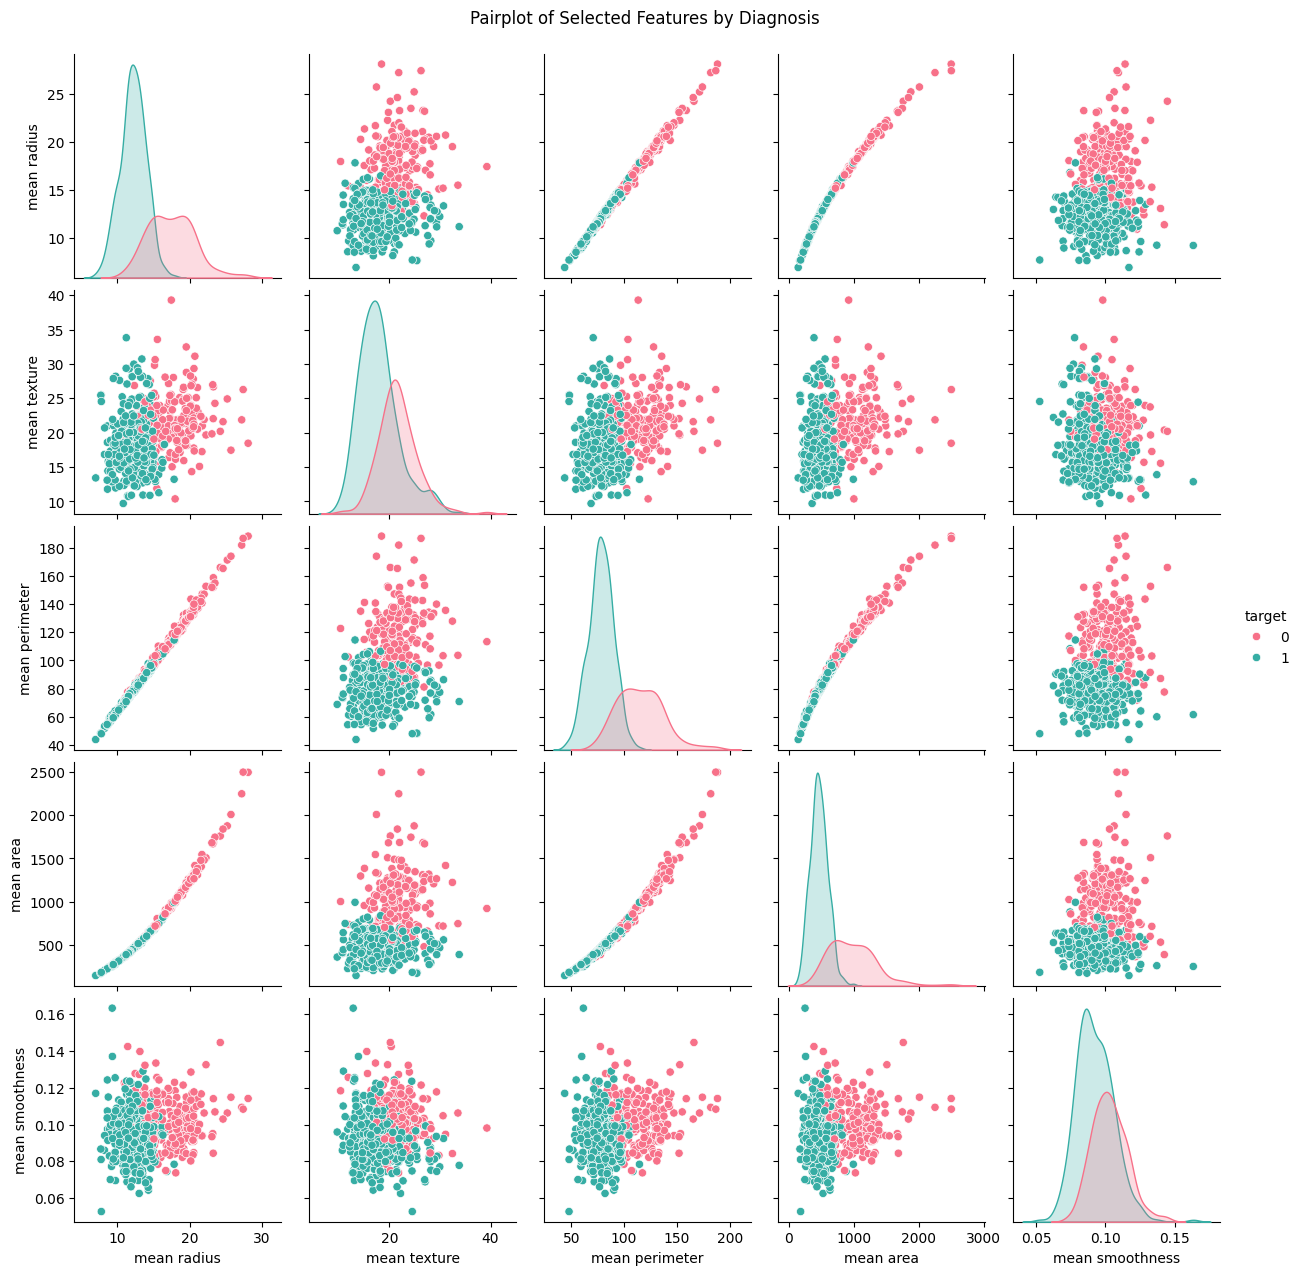

In [14]:
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
sns.pairplot(df[selected_features + ['target']], hue='target', palette='husl')
plt.suptitle('Pairplot of Selected Features by Diagnosis', y=1.02)
plt.show()

### Boxplots – Compare Distributions per Class

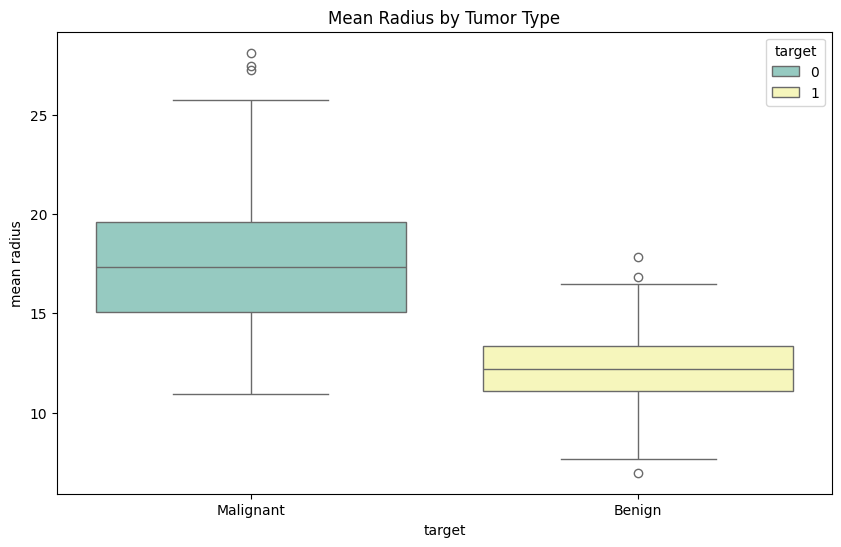

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='mean radius', data=df, hue='target', palette='Set3')
plt.title('Mean Radius by Tumor Type')
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.show()

### Distribution Plots – Look for Skewness

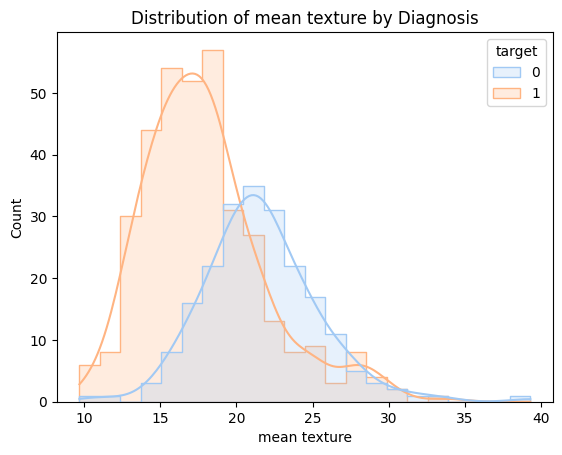

In [16]:
feature = 'mean texture'
sns.histplot(data=df, x=feature, hue='target', kde=True, palette='pastel', element='step')
plt.title(f'Distribution of {feature} by Diagnosis')
plt.show()

##  Data Preprocessing

In [17]:
# Separating features and target
x = df.drop('target', axis=1)
y = df['target']

In [18]:
# Splitting the data into training data and testing data (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                     random_state=42, stratify=y)
print(x.shape, x_train.shape, x_test.shape )
print(y.shape, y_train.shape, y_test.shape)                                       

(569, 30) (455, 30) (114, 30)
(569,) (455,) (114,)


In [19]:
# Feature Scaling (Standardization
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_scaled = scaler.fit_transform(x)

# Model Building & Training

### Logistic Regression

In [20]:
# Initialize logistic regression
model_log = LogisticRegression()

# Fit model on scaled training data
model_log.fit(x_train_scaled, y_train)

# Predict on test set
y_pred = model_log.predict(x_test_scaled)

print(y_pred)

[0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1
 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0
 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1
 0 1 1]


### Model Evaluation

Accuracy: 0.9824561403508771

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



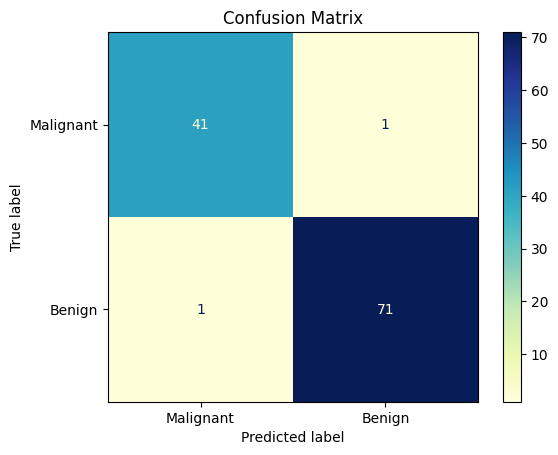

ROC AUC Score: 0.9953703703703703


In [21]:
# Accuracy
acc_log = accuracy_score(y_test, y_pred)
print("Accuracy:", acc_log)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Malignant', 'Benign'])
disp.plot(cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.show()

# ROC AUC
y_proba = model_log.predict_proba(x_test_scaled)[:, 1]
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

### ROC Curve Visualization

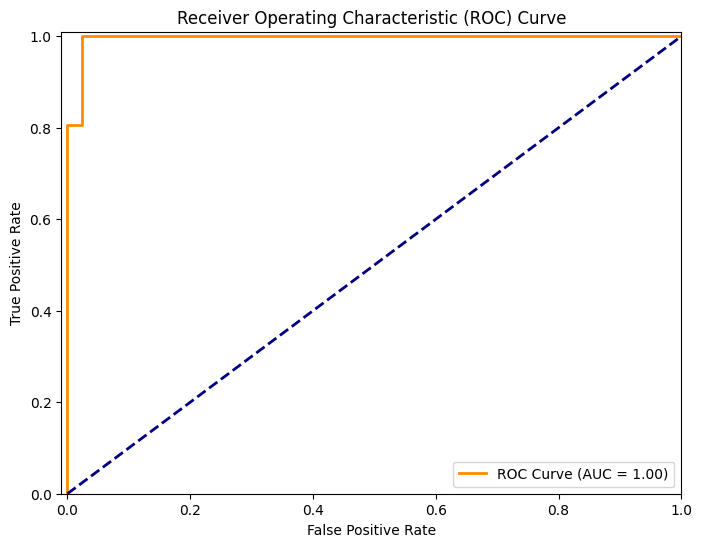

In [22]:
# Get predicted probabilities for the positive class
y_proba = model_log.predict_proba(x_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc_log = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_log:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Random Forest Classifier

In [23]:
# Initialize the model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train
model_rf.fit(x_train_scaled, y_train)

# Predict
y_pred_rf = model_rf.predict(x_test_scaled)

print(y_pred_rf)

[0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1
 0 1 1]


### Evaluation of Random Forest Classifier Model

Random Forest Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



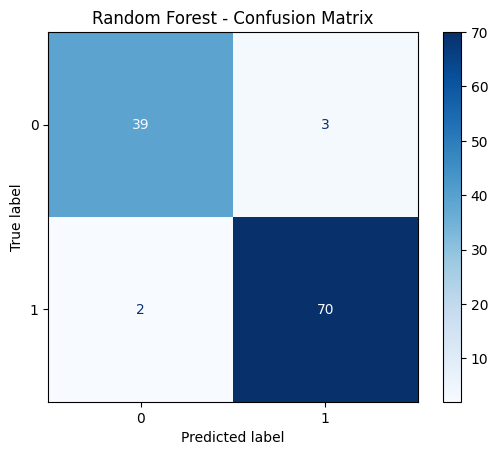

In [24]:
# Accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", acc_rf)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rf.classes_)
disp.plot(cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.show()

###  ROC curve for Random Forest

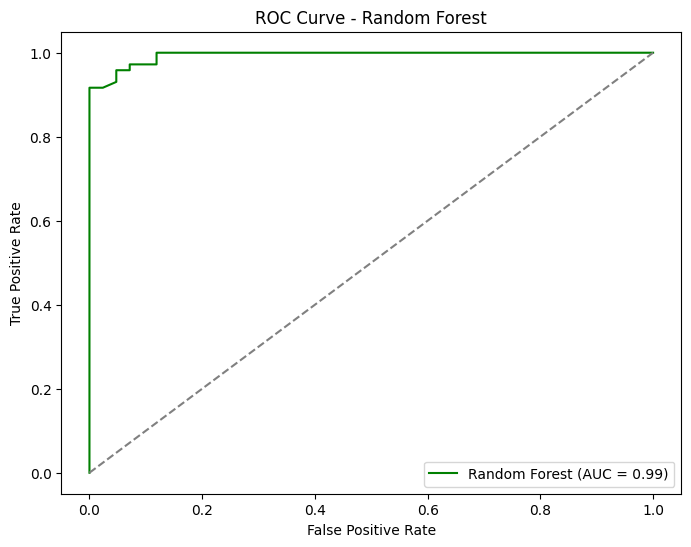

ROC AUC Score of rf: 0.9938822751322751


In [25]:
# Probabilities
y_proba_rf = model_rf.predict_proba(x_test_scaled)[:, 1]

# ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# ROC AUC
y_proba_rf = model_rf.predict_proba(x_test_scaled)[:, 1]
print("ROC AUC Score of rf:", roc_auc_score(y_test, y_proba_rf))

## Model Performance Comparison

| Metric         | Logistic Regression | Random Forest |
|----------------|---------------------|---------------|
| Accuracy       | 0.98                | 0.95          |
| ROC AUC Score  | 0.99                | 0.99          |
| Precision      | 0.95                | 0.98          |
| Recall         | 0.97                | 0.98          |
| F1-Score       | 0.96                | 0.98          |


### Visual Comparison

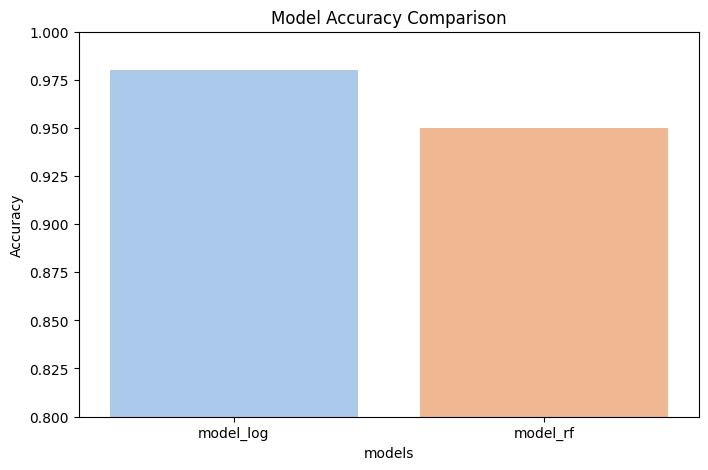

In [26]:
df_plot = pd.DataFrame({
    'models' : ['model_log', 'model_rf'],
    'accuracy' : [0.98, 0.95], 
    'roc_auc' : [0.99, 0.99] 
})

# Plot Accuracy Comparison
plt.figure(figsize=(8, 5))
sns.barplot(data=df_plot, x='models', y='accuracy', hue='models', palette='pastel')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.show()

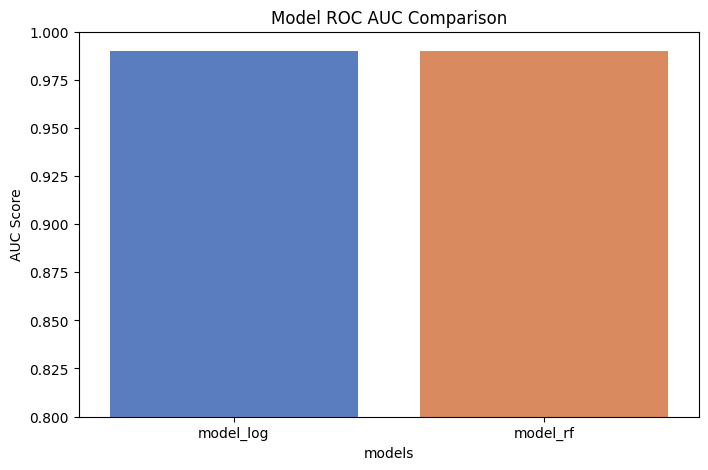

In [27]:
# Plot ROC AUC Comparison
plt.figure(figsize=(8, 5))
sns.barplot(data=df_plot,x='models', y='roc_auc', hue='models', palette='muted')
plt.title('Model ROC AUC Comparison')
plt.ylabel('AUC Score')
plt.ylim(0.8, 1.0)
plt.show()

## Cross-Validation

In [28]:
# Initialize models
log_reg = LogisticRegression(max_iter=1000, random_state=1)

# Logistic Regression Cross-Validation
log_scores = cross_val_score(log_reg, x_scaled, y, cv=5)
print("Logistic Regression CV Scores:", log_scores)
print("Mean Accuracy (LogReg):", np.round(log_scores.mean(), 4))

Logistic Regression CV Scores: [0.98245614 0.98245614 0.97368421 0.97368421 0.99115044]
Mean Accuracy (LogReg): 0.9807


In [29]:
# Initialize models
rf_clf = RandomForestClassifier(random_state=1)

# Random Forest Cross-Validation
rf_scores = cross_val_score(rf_clf, x_scaled, y, cv=5)
print("\nRandom Forest CV Scores:", rf_scores)
print("Mean Accuracy (RF):", np.round(rf_scores.mean(), 4))


Random Forest CV Scores: [0.92982456 0.94736842 0.98245614 0.97368421 0.96460177]
Mean Accuracy (RF): 0.9596


# Predictive System: Select a Model and Input Test Data

In [30]:
# Function to predict cancer using selected model
def predict_cancer(model_choice, input_data):
    """
    Predict the cancer diagnosis based on the selected model.
    
    Parameters:
    model_choice (str): The model to use for prediction ('Logistic Regression' or 'Random Forest').
    input_data (list): List of feature values for a single sample.
    
    Returns:
    str: The prediction result ('Benign' or 'Malignant').
    """
    # List of feature names (30 features)
    columns = [
        'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness',
        'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 
        'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 
        'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 
        'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness',
        'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension'
    ]
    
    # Convert input data to DataFrame with proper column names
    input_df = pd.DataFrame([input_data], columns=columns)
    
    # Scale the data using the pre-fitted scaler
    input_scaled = scaler.transform(input_df)
    
    if model_choice == "Logistic Regression":
        prob = model_log.predict_proba(input_scaled)[0]
    elif model_choice == "Random Forest":
        prob = model_rf.predict_proba(input_scaled)[0]
    else:
        return "Invalid model choice. Please choose either 'Logistic Regression' or 'Random Forest'."
    
    # Get predicted class
    predicted_class = model_log.predict(input_scaled) if model_choice == "Logistic Regression" else model_rf.predict(input_scaled)
    
    # Determine the label and confidence
    if predicted_class == 0:
        result = "Malignant Cancer Detected❗"
        confidence = prob[0]  # Probability of Malignant class
    else:
        result = "Benign No Cancer✅"
        confidence = prob[1]  # Probability of Benign class
    
    # Return prediction result with confidence
    return f"{result} (Confidence: {confidence*100:.2f}%)"

### Prediction Logistic Model 

In [31]:
test_data = [
    17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
    1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
    25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189
]

# Test prediction with Logistic Regression
prediction = predict_cancer("Logistic Regression", test_data)
print(prediction)

Malignant Cancer Detected❗ (Confidence: 100.00%)


### Prediction of Random Forest  Model

In [32]:
test_data = [
    17.99, 20.66, 117.8, 991.7, 0.1036, 0.1304, 0.1201, 0.08824, 0.1992, 0.06069,
    0.4537, 0.8733, 3.061, 49.81, 0.007231, 0.02772, 0.02509, 0.0148, 0.01414, 0.003336,
    21.08, 25.41, 138.1, 1349, 0.1482, 0.3735, 0.3301, 0.1974, 0.306, 0.08503
]

# Test prediction with Random Forest 
prediction = predict_cancer("Random Forest", test_data)
print(prediction)

Malignant Cancer Detected❗ (Confidence: 100.00%)


In [33]:
import pickle

pickle.dump(model_log, open('model_logistic.pkl', 'wb'))
pickle.dump(model_rf, open('model_random_forest.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))